## 1. Stacks

**LIFO: Last in, first out**
<br>
A user may insert objects into a stack at any time, but may only access or remove the most recently inserted object that on top of the stack.


Examples:
1. Internet Web Browsers store the addresses of recently visited sites in a stack. Allows the user to pop back to previously visited sites using the 'back' button
2. Text editors, 'undo' mechanism.

### 1.1 The Stack Abstract Data Types

Stacks are the simplest of all data structures.


A stack is an abstract data type(ADT) that an instance S supports the following methods.

1. S.push(e):
    - Add element e to the top of stack S
2. S.pop():
    - Remove and return the top element from the stack S
    - An error occurs if the stack is empty
3. S.top():
    - Return a reference to the top element of stack S, without removing it
    - An error occurs if the stack is empty
4. S.is_empty():
    - Return True if stack S does not contain any elements
5. len(S):
    - Return the number of elements in stack S
    - Implemented with the special method \__len__

### 1.2 Simple Array-Based Stack Implementation

Use a list for internal storage while providing a public interface consistent with a stack.

#### The Adapter Pattern

The adapter design pattern:
    - Modify an existing class so its methods match those of a related, but different class or interface
    - One general way: define a new class contains an instance of the existing class as a hidden field.
    
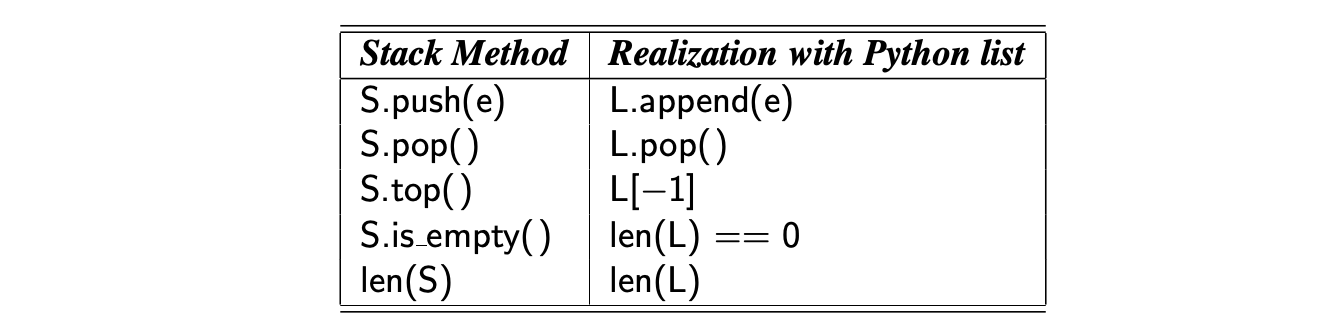

#### Implementing a Stack using a Python List

when pop is called on an empty Python list, the IndexError it raise is not appropriate for a stack.
<br><br>
Define a new exception class.

In [1]:
class Empty(Exception):
    '''
    Error attempting to access an element from an empty container
    '''
    pass

In [2]:
class ArrayStack:
    '''
    LIFO Stack implementation using a Python list as underlying storage
    '''
    def __init__(self):
        self._data = [] # non-public list instance
        
    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return len(self._data) == 0
    
    def push(self, e):
        self._data.append(e)
        
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()
    
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]

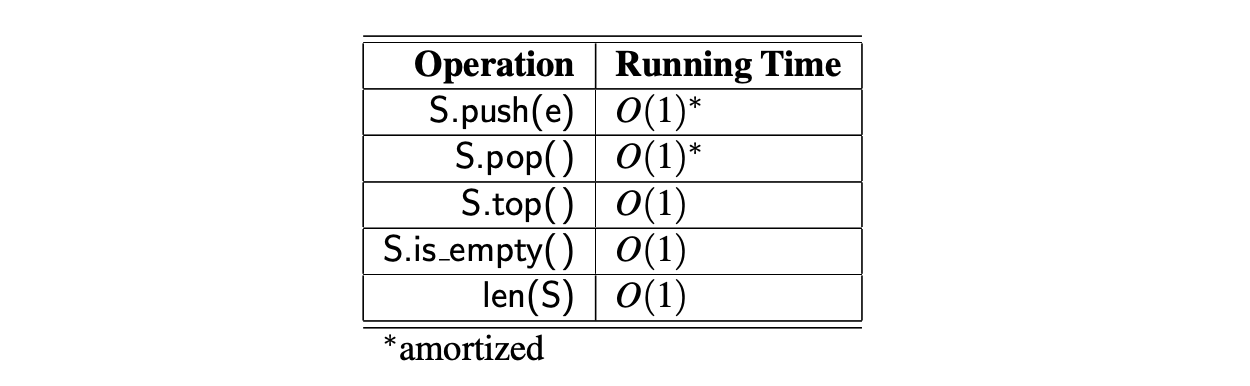

### 1.3 Reversing Data using a Stack

A stack can be used as a general tool to reverse a data sequence.
<br><br>
Print a file in reverse order.

In [4]:
def reverse_file(filename):
    '''
    Overwrite given file with its contents line-by-line reversed
    '''
    S = ArrayStack()
    original = open(filename)
    for line in original:
        # 去掉每一行最后的 \n
        # 以防原文件的最后一行没有结尾的 \n
        # 这样在reverse时，最后一行会与倒数第二行相连
        S.push(line.rstrip('\n'))
    original.close()
    # overwrite in LIFO order
    ouput = open(filename, 'w')
    while not S.is_empty():
        output.write(S.pop() + '\n')
    output.close()

### 1.4 Matching Parentheses and HTML Tags

#### Matching Parentheses

In [8]:
def is_matched(expr):
    '''
    Return True if all delimiters are properly match
    '''
    lefty = '({['
    righty = ')}]'
    S = ArrayStack()
    for c in expr:
        if c in lefty:
            S.push(c)
        elif c in righty:
            if S.is_empty():
                return False
            if righty.index(c) != lefty.index(S.pop()):
                return False
    return S.is_empty()

In [11]:
expr = '[(5+x)-(y+z)]'
print(is_matched(expr))
expr_incorrect = ')(()){([()])}'
print(is_matched(expr_incorrect))

True
False


#### Matching Tags in a Markup Language


In [14]:
def is_matched_html(raw):
    '''
    Return True if all HTML tags are properly match
    '''
    S = ArrayStack()
    j = raw.find('<') # find first '<' character
    while j != -1:
        k = raw.find('>', j+1)
        if k == -1:
            return False
        tag = raw[j+1:k] # strip away < >
        # for opening tag:
        if not tag.startswith('/'):
            S.push(tag)
        else:
            if S.is_empty():
                return False
            if tag[1:] != S.pop():
                return False
        j = raw.find('<', k+1)
    return S.is_empty()

In [12]:
help(str.find)

Help on method_descriptor:

find(...)
    S.find(sub[, start[, end]]) -> int
    
    Return the lowest index in S where substring sub is found,
    such that sub is contained within S[start:end].  Optional
    arguments start and end are interpreted as in slice notation.
    
    Return -1 on failure.



In [15]:
raw1 = '<body><center><h1> The Little Boat </h1></center>'
print(is_matched_html(raw1))
raw2 = '<center><h1> The Little Boat </h1></center>'
print(is_matched_html(raw2))

False
True


## 2. Queues

**FIFO: First in, First out**
<br>
Elements can be inserted at any time, but only the element that has been in the queue the longest can be next removed.

Examples:
1. Handle calls to a customer service center
2. Networked printer
3. Web server responding

### 2.1 The Queue Abstract Data Types

The queue abstract data type(ADP) supports the following methods:
1. Q.enqueue(e):
    - Add element e to the back of queue Q
2. Q.dequeue():
    - Remove and return the first element from queue Q
    - An error occurs if the queue is empty
3. Q.first():
    - Return a reference to the element at the front of queue Q, without removing it.
    - An error occurs if the queue is empty
4. Q.is_empty():
    - Return True if queue Q does not contain any elements
5. len(Q):
    - Return the number of elements in queue Q
    - implemented in python with \__len__

### 2.2 Array-Based Queue Implementation

Using append(e) as enqueue and pop(0) as dequeue would be very inefficient. A call to pop(0) always causes the worst-case behavior of O(n) time

#### Using an Array Circularly

Assume the underlying array has fixed length N that is greater than the actual number of elements in the queue.

- 在dequeue时，指向栈头的指针向后移动
- 当queue中的元素占满栈尾的位置时，新元素的enqueue从栈头继续
- 当指向栈头的指针index为f，指向下一个元素的index为(f+1) % N

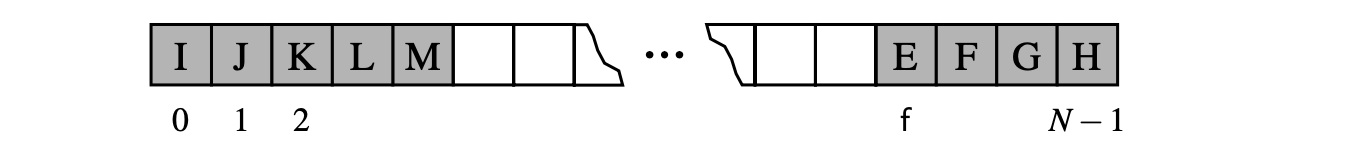
First element E and last element M

In [17]:
class ArrayQueue:
    '''
    FIFO queue implementation using a Python list as underlying storage
    '''
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        # a reference to a list instance with a fixed capacity
        self._data = [None] * ArrayQueue.DEFAULT_CAPACITY
        # an integer representing the current number of elements stored in the queue
        self._size = 0
        # an integer represents the index within _data of the first element of the queue
        self._front = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]
    
    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        answer = self._data[self._front]
        # help garbage collection
        self._data[self.front] = None
        self._front = (self._front + 1) % len(self._data)
        self._size -= 1
        # shrinking the underlying array
        if 0 < self._size < len(self._data) // 4:
            self._resize(len(self._data) // 2)
        return answer
    
    def enqueue(self, e):
        if self._size == len(self._data):
            # double the array size
            self._resize(2 * len(self.data))
        avail = (self._front + self._size) % len(self._data)
        self._data[avail] = e
        self._size += 1
        
    def _resize(self, cap):
        # assume cap >= len(self)
        old = self._data
        self._data = [None] * cap
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk) % len(old)
        self._front = 0

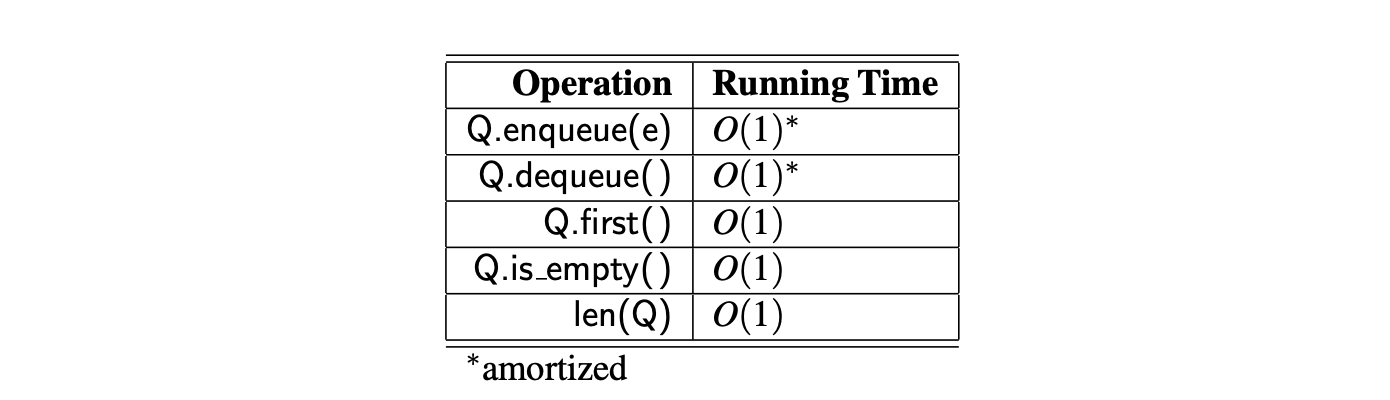

## 3. Double-Ended Queues

Double-Ended Queue or deque(pronounced 'deck'):
    - A queue-like data structure that suppports insertion and deletion at both the front and the back of the queue.
    
### 3.1 The Deque Abstract Data Type

1. D.add_first(e):
    - add element e to the front of deque D
2. D.add_last(e):
    - add element e to the end of deque D
3. D.delete_first():
    - remove and return the first element from deque D
    - An error occurs if the deque is empty
4. D.delete_last():
    - remove and return the last element from deque D
    - An error occurs if the deque is empty
5. D.first():
    - Return the first element of deque D
    - An error occurs if the deque is empty
6. D.last():
    - Return the last element of deque D
    - An error occurs if the deque is empty
7. D.is_empty():
    - Return True if deque D does not contain any elements
8. len(D):
    - Return the number of elements in deque D
    - implemented with method \__len__

### 3.2 Implementing a Deque with a Circular Array

In [54]:
class ArrayDeque:
    '''
    Deque implementation using a Python list as underlying storage
    '''
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        self._data = [None] * ArrayQueue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
        
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Deque is empty')
        return self._data[self._front]
    
    def last(self):
        if self.is_empty():
            raise Empty('Deque is empty')
        return self._data[(self._front + self._size - 1) % len(self._data)]
    
    def add_first(self, e):
        if self._size == len(self._data):
            self._resize(2 * len(self._data))
        if self.is_empty():
            avail = self._front
        else:
            avail = (self._front - 1) % len(self._data)
        self._data[avail] = e
        self._front = avail
        self._size += 1
        
    def add_last(self, e):
        if self._size == len(self._data):
            self._resize(2 * len(self._data))
        avail = (self._front + self._size) % len(self._data)
        self._data[avail] = e
        self._size += 1
        
    def delete_first(self):
        if self.is_empty():
            raise Empty('Deque is empty')
        answer = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front + 1) % len(self._data)
        self._size -= 1
        if 0 < self._size < len(self._data) // 4:
            self._resize(len(self._data) // 2)
        return answer
    
    def delete_last(self):
        if self.is_empty():
            raise Empty('Deque is empty')
        last = (self._front + self._size - 1) % len(self._data)
        answer = self._data[last]
        self._data[last] = None
        self._size -= 1
        if 0 < self._size < len(self._data) // 4:
            self._resize(len(self._data) // 2)
        return answer
    
    def _resize(self, cap):
        old = self._data
        self._data = [None] * cap
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk) % len(old)
        self._front = 0
        
    def __str__(self):
        return str(self._data)